# End-to-End machine learning project
Original Dataset Source: The Our World in Data Coronavirus (COVID-19) Vaccinations: https://ourworldindata.org/covid-vaccinations


## 1- Look at the big picture and frame the problem.

### Frame the problem
1. Supervised learning – training examples are labeled.
2. A regression task – predict a value.
3. Batch learning 
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the big picture
Predictions will be used to evauate the ratio of high-risk patients in the hospital. 'High risk' patients is defined as the number of patients in the ICU divided by the total number of patients in the hospital. This metric can aid other counties in predicting the potential ICU patients based on the vaccination data, assisting governments in decision-making concerning ICU capacity and vaccine promotion.

## 2. A description of the dataset and 3 graphs of EDA.

## The complete Our World in Data COVID-19 dataset
**Attributes for owid-covid-data.csv dataset:**
The below attributes are copied from Github: https://github.com/owid/covid-19-data/tree/master/public/data.
#### Feaures:
- total_cases: Total confirmed cases of COVID-19. Counts can include probable cases, where reported.
- new_cases: New confirmed cases of COVID-19. Counts can include probable cases, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA.
- new_cases_smoothed: New confirmed cases of COVID-19 (7-day smoothed). Counts can include probable cases, where reported.
- total_cases_per_million:Total confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported.
- new_cases_per_million: New confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported.
- new_cases_smoothed_per_million: New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people. Counts can include probable cases, where reported.
- icu_patients	Number of COVID-19 patients in intensive care units (ICUs) on a given day
- total_tests: Total tests for COVID-19
- new_tests: New tests for COVID-19 (only calculated for consecutive days)
- total_tests_per_thousand: Total tests for COVID-19 per 1,000 people
- new_tests_per_thousand: New tests for COVID-19 per 1,000 people
- new_tests_smoothed: New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we assume that testing changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window
- new_tests_smoothed_per_thousand: New tests for COVID-19 (7-day smoothed) per 1,000 people
- positive_rate: The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of tests_per_case)
- tests_per_case: Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average (this is the inverse of positive_rate)
- total_vaccinations: Total number of COVID-19 vaccination doses administered
- people_vaccinated: Total number of people who received at least one vaccine dose
- people_fully_vaccinated: Total number of people who received all doses prescribed by the initial vaccination protocol
- total_boosters: Total number of COVID-19 vaccination booster doses administered (doses administered beyond the number prescribed by the vaccination protocol)
- new_vaccinations: New COVID-19 vaccination doses administered (only calculated for consecutive days)
- new_vaccinations_smoothed: New COVID-19 vaccination doses administered (7-day smoothed). For countries that don't report vaccination data on a daily basis, we assume that vaccination changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window

- new_people_vaccinated_smoothed: Daily number of people receiving their first vaccine dose (7-day smoothed)
#### Target: icu_patients / hospital_patients =  Number of COVID-19 patients in intensive care units (ICUs) on a given day / Number of COVID-19 patients in hospital on a given day

In [1]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from github

url = "https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv"

# Extract data of Canada from row 53301 ~ 54341
start_row = 53558
end_row = 54102
df = pd.read_csv(url, skiprows=range(1, start_row), nrows = end_row - start_row)

# Create a new column "high_risk" by dividing "icu_patients" by "hosp_patients"
df['high_risk'] = df['icu_patients'] / df['hosp_patients']

# Let's create a backup copy of the dataset
data_backup = df

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,high_risk
0,CAN,North America,Canada,2020-03-01,15.0,2.0,0.857,NaN,0.0,0.000,...,NaN,2.5,82.43,0.929,38454328.0,-2274.9001,-4.06,-3.36,-60.041645,NaN
1,CAN,North America,Canada,2020-03-02,15.0,0.0,0.857,NaN,0.0,0.000,...,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN,NaN
2,CAN,North America,Canada,2020-03-03,24.0,9.0,2.000,NaN,0.0,0.000,...,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN,NaN
3,CAN,North America,Canada,2020-03-04,33.0,9.0,3.286,NaN,0.0,0.000,...,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN,NaN
4,CAN,North America,Canada,2020-03-05,33.0,0.0,3.143,NaN,0.0,0.000,...,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,CAN,North America,Canada,2021-08-22,1465866.0,2962.0,2287.857,26521.0,6.0,13.286,...,NaN,2.5,82.43,0.929,38454328.0,16140.2000,3.30,8.87,423.016500,0.285375
540,CAN,North America,Canada,2021-08-23,1468744.0,2878.0,2376.286,26522.0,1.0,13.000,...,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN,0.285881
541,CAN,North America,Canada,2021-08-24,1471587.0,2843.0,2513.143,26528.0,6.0,13.857,...,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN,0.318660
542,CAN,North America,Canada,2021-08-25,1473645.0,2058.0,2524.429,26546.0,18.0,15.714,...,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN,0.321101


#### Use head() to look at the first 5 rows

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,high_risk
0,CAN,North America,Canada,2020-03-01,15.0,2.0,0.857,NaN,0.0,0.0,...,NaN,2.5,82.43,0.929,38454328.0,-2274.9001,-4.06,-3.36,-60.041645,NaN
1,CAN,North America,Canada,2020-03-02,15.0,0.0,0.857,NaN,0.0,0.0,...,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN,NaN
2,CAN,North America,Canada,2020-03-03,24.0,9.0,2.000,NaN,0.0,0.0,...,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN,NaN
3,CAN,North America,Canada,2020-03-04,33.0,9.0,3.286,NaN,0.0,0.0,...,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN,NaN
4,CAN,North America,Canada,2020-03-05,33.0,0.0,3.143,NaN,0.0,0.0,...,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN,NaN


#### Use describe() method to see a summary of the numerical attributes.

In [5]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,high_risk
count,5.440000e+02,544.000000,544.000000,535.000000,544.000000,544.000000,544.000000,544.000000,544.000000,535.000000,...,0.0,544.0,5.440000e+02,5.440000e+02,544.0,78.000000,78.000000,78.000000,78.000000,513.000000
mean,5.806928e+05,2713.170956,2699.270474,14673.254206,48.862132,48.767075,15100.844300,70.555699,70.194187,381.576125,...,NaN,2.5,8.243000e+01,9.290000e-01,38454328.0,9040.962063,2.846795,4.183077,237.494963,0.240888
std,5.311616e+05,2543.377950,2518.752228,8493.916968,49.921313,46.856557,13812.791639,66.140238,65.499811,220.883260,...,NaN,0.0,2.418069e-13,1.222369e-14,0.0,5383.851516,2.041649,6.102250,141.039748,0.078557
min,1.500000e+01,0.000000,0.857000,1.000000,0.000000,0.000000,0.390000,0.000000,0.022000,0.026000,...,NaN,2.5,8.243000e+01,9.290000e-01,38454328.0,-2702.100300,-4.060000,-6.020000,-71.316780,0.113178
25%,1.080028e+05,570.750000,535.464000,8818.000000,9.000000,9.535500,2808.597750,14.842500,13.924250,229.311000,...,NaN,2.5,8.243000e+01,9.290000e-01,38454328.0,5681.173675,3.210000,0.217500,149.943725,0.185465
50%,3.502815e+05,1679.000000,1668.000000,12053.000000,32.000000,32.143000,9109.026500,43.662000,43.376500,313.437000,...,NaN,2.5,8.243000e+01,9.290000e-01,38454328.0,9707.748000,3.280000,3.220000,256.217470,0.221311
75%,1.055983e+06,4282.500000,4439.750000,23157.500000,69.000000,74.178500,27460.706500,111.366000,115.455500,602.208000,...,NaN,2.5,8.243000e+01,9.290000e-01,38454328.0,13754.450000,3.725000,7.057500,360.488682,0.299649
max,1.475978e+06,9570.000000,8730.429000,26581.000000,222.000000,175.714000,38382.624000,248.867000,227.034000,691.236000,...,NaN,2.5,8.243000e+01,9.290000e-01,38454328.0,16140.200000,4.430000,23.750000,423.016500,0.413063


#### Use info() to get a quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    544 non-null    object 
 1   continent                                   544 non-null    object 
 2   location                                    544 non-null    object 
 3   date                                        544 non-null    object 
 4   total_cases                                 544 non-null    float64
 5   new_cases                                   544 non-null    float64
 6   new_cases_smoothed                          544 non-null    float64
 7   total_deaths                                535 non-null    float64
 8   new_deaths                                  544 non-null    float64
 9   new_deaths_smoothed                         544 non-null    float64
 10  total_cases_pe

### For our dataset, there is no cat data categorical

## Explore and visualize the data to gain insights.

In [7]:
# df.hist(figsize=(50, 36))
# plt.show()

## Look for correlations between the features

### Look for correlations using Pearson correlation coefficient. Plot correlation graphs using sns.lineplot and scatterplot

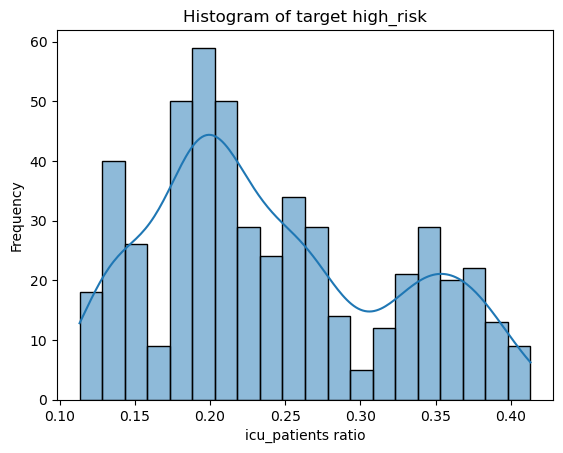

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['high_risk'], bins=20, kde=True)
plt.title('Histogram of target high_risk')
plt.xlabel('icu_patients ratio')
plt.ylabel('Frequency')
plt.show()


/Users/chenshangen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


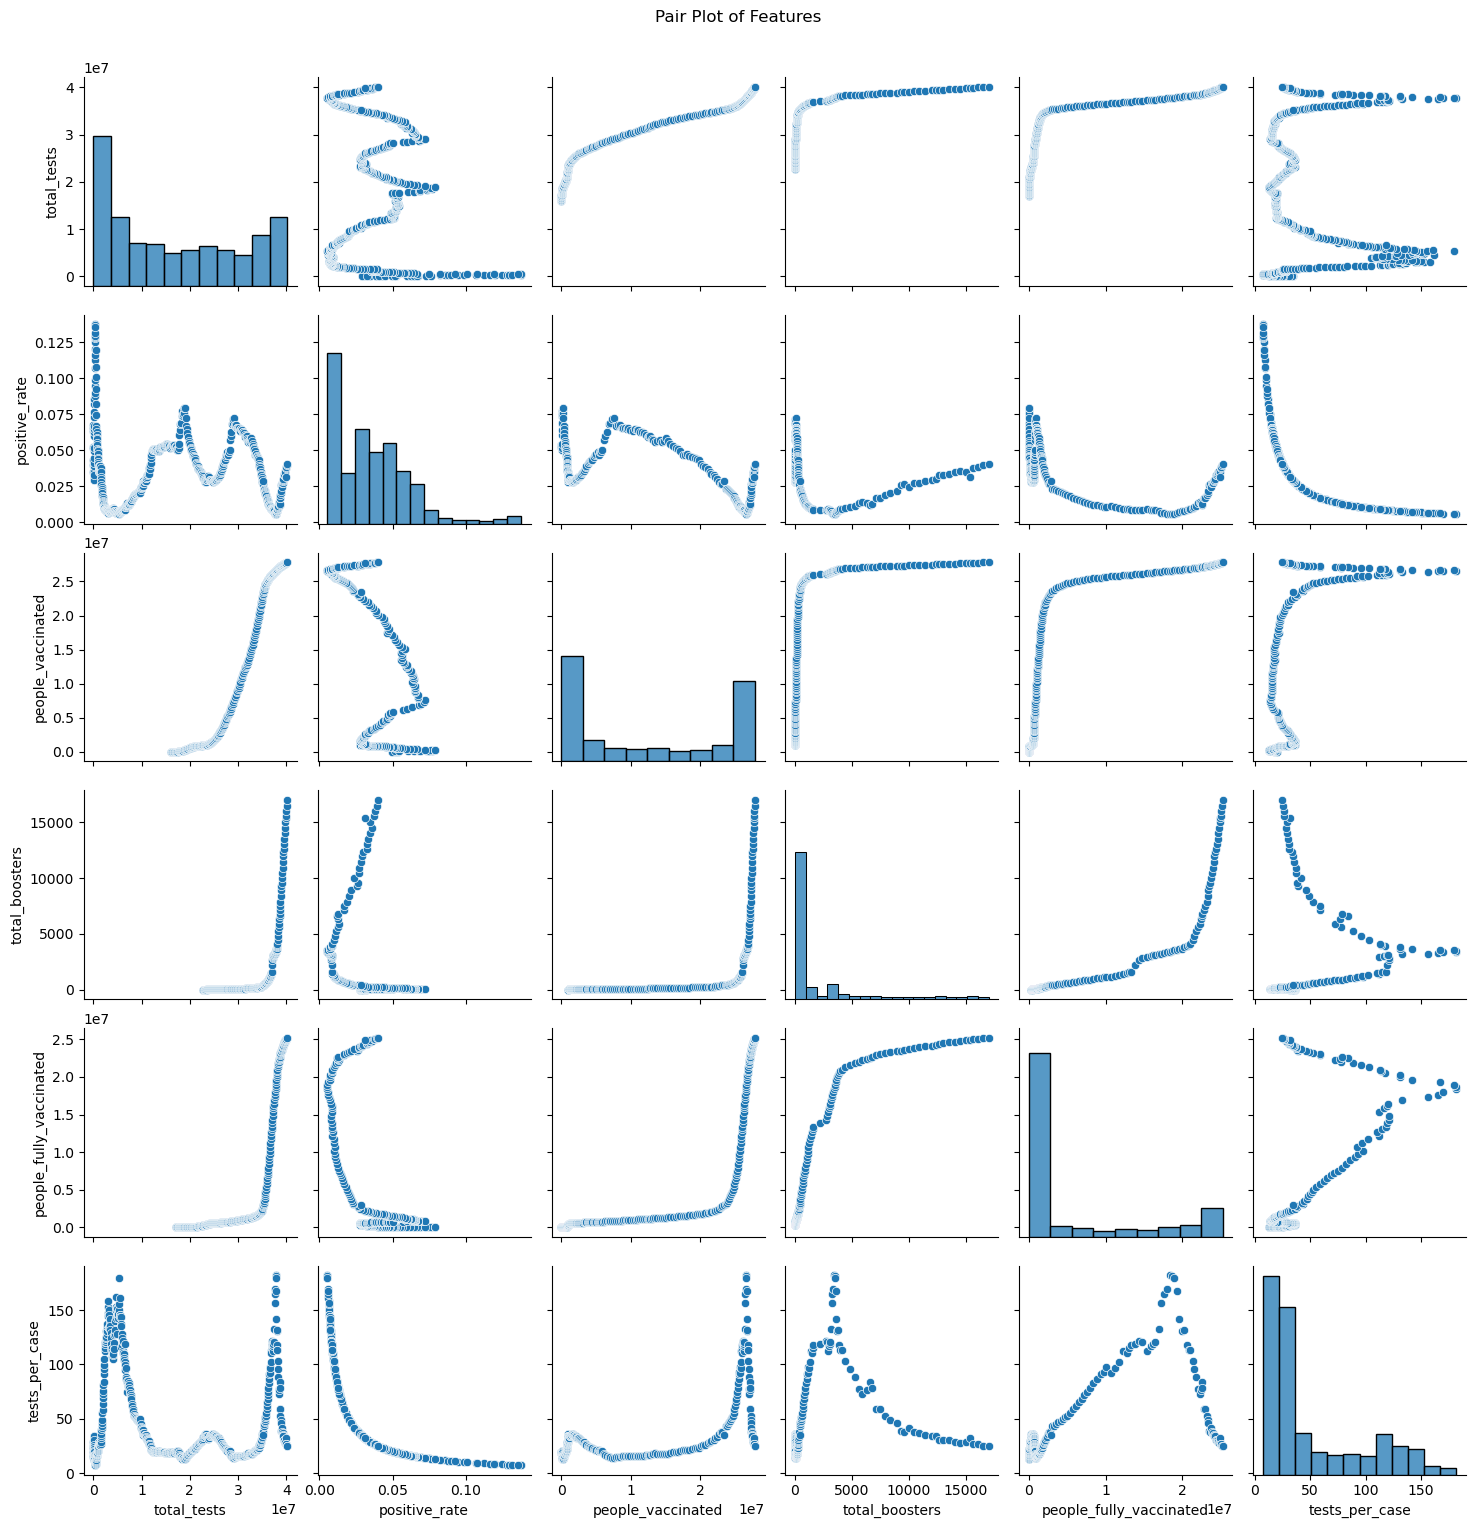

In [9]:
sns.pairplot(df[['total_tests', 'positive_rate', 'people_vaccinated','total_boosters', 'people_fully_vaccinated','tests_per_case']])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

In [10]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Specify the attribute you want to check the correlation for
# target_attribute = 'high_risk'

# # Create a DataFrame that includes the target attribute and all other attributes
# attributes_to_plot = df[[target_attribute] + [col for col in df.columns if col != target_attribute]]

# # Create a pair plot
# sns.pairplot(attributes_to_plot, diag_kind='kde')  # diag_kind can be 'kde' for kernel density estimation or 'hist' for histograms

# # Show the plot
# plt.show()


In [11]:
#corr method has pearson standard correlation coefficient as the default 

corr_matrix = df.corr(numeric_only=True)
corr_matrix.head(15)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,high_risk
total_cases,1.000000,0.321624,0.346023,0.966020,-0.135731,-0.125796,1.000000,0.321624,0.346023,0.966020,...,NaN,NaN,NaN,NaN,NaN,0.852431,0.336737,-0.244101,0.850362,0.827103
new_cases,0.321624,1.000000,0.984203,0.364324,0.435681,0.431167,0.321624,1.000000,0.984203,0.364324,...,NaN,NaN,NaN,NaN,NaN,0.516260,0.353155,0.022600,0.516382,0.030348
new_cases_smoothed,0.346023,0.984203,1.000000,0.386910,0.453923,0.463302,0.346023,0.984203,1.000000,0.386910,...,NaN,NaN,NaN,NaN,NaN,0.512891,0.364883,0.057910,0.513244,0.047251
total_deaths,0.966020,0.364324,0.386910,1.000000,-0.156433,-0.135007,0.966020,0.364324,0.386910,1.000000,...,NaN,NaN,NaN,NaN,NaN,0.946754,0.490646,-0.390250,0.945486,0.734465
new_deaths,-0.135731,0.435681,0.453923,-0.156433,1.000000,0.934325,-0.135731,0.435681,0.453923,-0.156433,...,NaN,NaN,NaN,NaN,NaN,0.063615,0.251718,0.584194,0.064093,-0.380695
new_deaths_smoothed,-0.125796,0.431167,0.463302,-0.135007,0.934325,1.000000,-0.125796,0.431167,0.463302,-0.135007,...,NaN,NaN,NaN,NaN,NaN,0.079152,0.298863,0.586167,0.079693,-0.423878
total_cases_per_million,1.000000,0.321624,0.346023,0.966020,-0.135731,-0.125796,1.000000,0.321624,0.346023,0.966020,...,NaN,NaN,NaN,NaN,NaN,0.852431,0.336737,-0.244101,0.850362,0.827103
new_cases_per_million,0.321624,1.000000,0.984203,0.364324,0.435681,0.431167,0.321624,1.000000,0.984203,0.364324,...,NaN,NaN,NaN,NaN,NaN,0.516259,0.353154,0.022599,0.516381,0.030348
new_cases_smoothed_per_million,0.346023,0.984203,1.000000,0.386910,0.453923,0.463302,0.346023,0.984203,1.000000,0.386910,...,NaN,NaN,NaN,NaN,NaN,0.512891,0.364885,0.057910,0.513244,0.047251
total_deaths_per_million,0.966020,0.364324,0.386910,1.000000,-0.156433,-0.135007,0.966020,0.364324,0.386910,1.000000,...,NaN,NaN,NaN,NaN,NaN,0.946754,0.490646,-0.390250,0.945486,0.734465


#### Let's look at correlations with regard to our target

In [12]:
# negitive correlation

sorted_correlations = corr_matrix["high_risk"].sort_values(ascending=True)
sorted_correlations.head(20)

new_deaths_smoothed               -0.423878
new_deaths_smoothed_per_million   -0.423870
new_deaths_per_million            -0.380703
new_deaths                        -0.380695
excess_mortality_cumulative       -0.279194
excess_mortality                  -0.233790
hosp_patients_per_million         -0.069305
hosp_patients                     -0.069305
reproduction_rate                 -0.038684
tests_per_case                    -0.023777
positive_rate                      0.024066
new_cases_per_million              0.030348
new_cases                          0.030348
new_cases_smoothed_per_million     0.047251
new_cases_smoothed                 0.047251
stringency_index                   0.049630
new_tests_per_thousand             0.086825
new_tests                          0.086833
new_tests_smoothed_per_thousand    0.121892
new_tests_smoothed                 0.121901
Name: high_risk, dtype: float64

In [13]:
# positive correlation

sorted_correlations = corr_matrix["high_risk"].sort_values(ascending=False)
sorted_correlations.head(20)

high_risk                                     1.000000
new_vaccinations_smoothed_per_million         0.914094
new_vaccinations_smoothed                     0.914094
people_vaccinated_per_hundred                 0.913384
people_vaccinated                             0.913383
new_vaccinations                              0.867680
total_cases_per_million                       0.827103
total_cases                                   0.827103
total_tests_per_thousand                      0.810600
total_tests                                   0.810600
total_vaccinations_per_hundred                0.804210
total_vaccinations                            0.804208
total_deaths                                  0.734465
total_deaths_per_million                      0.734465
people_fully_vaccinated_per_hundred           0.559066
people_fully_vaccinated                       0.559059
excess_mortality_cumulative_absolute          0.549062
excess_mortality_cumulative_per_million       0.546636
new_people

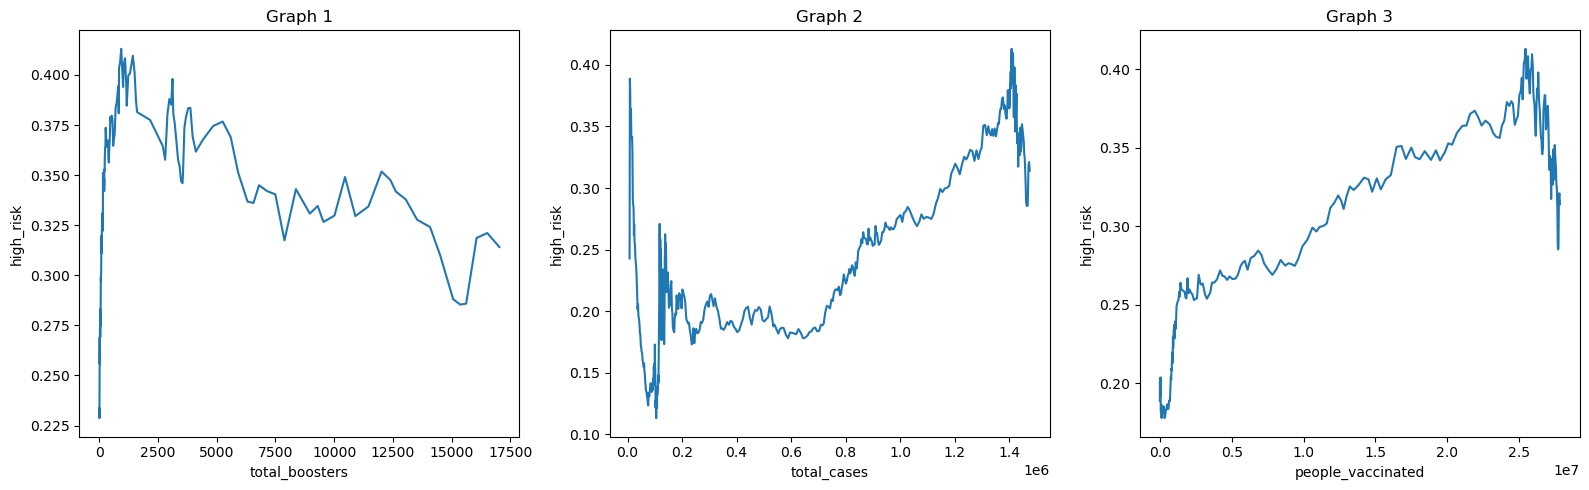

In [14]:
# Plot total_vaccinations vs. icu_patients

# Create subplots with three columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

G1 = sns.lineplot(x="total_boosters", y="high_risk", data=df, ax=ax1, err_style=None)
ax1.set_title('Graph 1')

# Plot the second graph
G2 = sns.lineplot(x="total_cases", y="high_risk", data=df, ax=ax2, err_style=None)
ax2.set_title('Graph 2')

# Plot the thire graph
G3 = sns.lineplot(x="people_vaccinated", y="high_risk", data=df, ax=ax3, err_style=None)
ax3.set_title('Graph 3')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

Text(0, 0.5, 'high_risk')

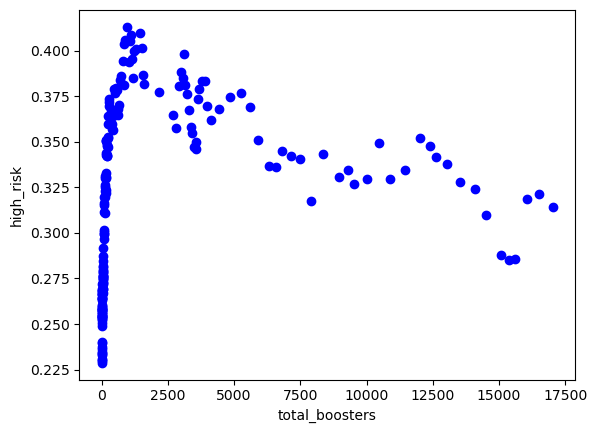

In [15]:
# Create a scatterplot of G2 and G3

X = df["total_boosters"]
y = df["high_risk"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("total_boosters")
plt.ylabel("high_risk")

## 3. Data cleaning and preprocessing.
### 3.1 Data cleaning

#### Check for duplicate rows and remove them if any.

In [16]:
# Check for duplicate rows and delete them

df.duplicated().sum()

0

### There is no duplicat rows

### Handle the missing values

In [17]:
# Find the number of missing values in each column
missing_values = df.isna().sum()

# Display the number of missing values in each column
print(missing_values)

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
                                          ... 
excess_mortality_cumulative_absolute       466
excess_mortality_cumulative                466
excess_mortality                           466
excess_mortality_cumulative_per_million    466
high_risk                                   31
Length: 68, dtype: int64


### For the features with many missing column, we will delete those features 
( Note that we do not delete the vaccine data because the missing data is from a period when the vaccine was not yet available.)

In [18]:
# delete feature excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality and excess_mortality_cumulative_per_million

df.drop(labels=['excess_mortality_cumulative_absolute'], axis=1, inplace=True)
df.drop(labels=['excess_mortality_cumulative'], axis=1, inplace=True)
df.drop(labels=['excess_mortality'], axis=1, inplace=True)
df.drop(labels=['excess_mortality_cumulative_per_million'], axis=1, inplace=True)
df.drop(labels=['weekly_icu_admissions'], axis=1, inplace=True)
df.drop(labels=['weekly_icu_admissions_per_million'], axis=1, inplace=True)
df.drop(labels=['weekly_hosp_admissions'], axis=1, inplace=True)
df.drop(labels=['weekly_hosp_admissions_per_million'], axis=1, inplace=True)

### Since we only train the data of Canada, the information for the country data is all the same. So we drop those data as well.

In [19]:
# drop same data
columns_to_drop = [ 'iso_code', 'continent', 'location', 'population', 'human_development_index',
                   'life_expectancy', 'hospital_beds_per_thousand', 'handwashing_facilities',
                   'male_smokers', 'female_smokers','diabetes_prevalence', 'tests_units',
                   'cardiovasc_death_rate', 'extreme_poverty', 'gdp_per_capita','aged_70_older',
                   'aged_65_older', 'median_age', 'population_density', 'stringency_index', 
 # 'total_vaccinations_per_hundred',
 # 'people_vaccinated_per_hundred',
 # 'people_fully_vaccinated_per_hundred',
 'total_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
'hosp_patients_per_million',
 'icu_patients_per_million',
'new_cases_per_million',
#  'total_tests_per_thousand',
#  'new_tests_per_thousand',
# 'new_tests_smoothed_per_thousand',
#  'total_boosters_per_hundred',
#  'new_vaccinations_smoothed_per_million',
#  'new_people_vaccinated_smoothed_per_hundred',
'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'reproduction_rate',
                     'hosp_patients',
                   'icu_patients',
                   'date'
 # 'total_tests',
 # 'new_tests',
 # 'new_tests_smoothed',
 # 'positive_rate',
 # 'tests_per_case',
]
df = df.drop(columns_to_drop, axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   total_tests                                 541 non-null    float64
 1   new_tests                                   538 non-null    float64
 2   total_tests_per_thousand                    541 non-null    float64
 3   new_tests_per_thousand                      538 non-null    float64
 4   new_tests_smoothed                          544 non-null    float64
 5   new_tests_smoothed_per_thousand             544 non-null    float64
 6   positive_rate                               544 non-null    float64
 7   tests_per_case                              544 non-null    float64
 8   total_vaccinations                          256 non-null    float64
 9   people_vaccinated                           256 non-null    float64
 10  people_fully_v

In [21]:
df.isna().sum()

total_tests                                     3
new_tests                                       6
total_tests_per_thousand                        3
new_tests_per_thousand                          6
new_tests_smoothed                              0
new_tests_smoothed_per_thousand                 0
positive_rate                                   0
tests_per_case                                  0
total_vaccinations                            288
people_vaccinated                             288
people_fully_vaccinated                       296
total_boosters                                347
new_vaccinations                              289
new_vaccinations_smoothed                     289
total_vaccinations_per_hundred                288
people_vaccinated_per_hundred                 288
people_fully_vaccinated_per_hundred           296
total_boosters_per_hundred                    347
new_vaccinations_smoothed_per_million         289
new_people_vaccinated_smoothed                289


#### For the remaining missing values, we will fill them with the mean.

#### We will do this through creating a pipeline, that will also scale the features and perform encoding in the next step.

## 3.2 Preprocessing
### Create a pipeline that will:

- Fill in the missing numerical values with the mean using a SimpleImputer

- Scale the numerical columns using StandardScaler. Not scale the target


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [23]:
# Get a list of column names from the 'students' DataFrame that are of numerical data types.
num_cols = df.select_dtypes(include='number').columns.to_list()

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), StandardScaler())

# Exclude the target from numerical columns
num_cols.remove("high_risk")

# Use ColumnTransformer to set the estimators and transformations
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols)],
                                    remainder='passthrough'
                                 )

In [24]:
num_cols

['total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed',
 'new_people_vaccinated_smoothed_per_hundred']

In [25]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['total_tests', 'new_tests',
                                  'total_tests_per_thousand',
                                  'new_tests_per_thousand',
                                  'new_tests_smoothed',
                                  'new_tests_smoothed_per_thousand',
                                  'positive_rate', 'tests_per_case',
                                  'total_vaccinations', 'people_vaccinated',
                                  'people_fully_vaccinated', 'total_boosters',
                                  'new_vaccinations',
                                  'new_vaccinations_smoothed',
                                  'total_vaccinations_per_hundred',
                                  'people_vaccinated_per_hundred',
                                  'people_fully_vaccinated_per_hundred',
                                  'total_boosters_per_hundred',
                                  'new_vaccinations_smoothed_per_million',
                                  'new_people_vaccinated_smoothed',
                                  'new_people_vaccinated_smoothed_per_hundred'])])

In [26]:
# Apply the preprocessing pipeline on the dataset

data_prepared = preprocessing.fit_transform(df)

# Scikit-learn strips the column headers, so just add them back on afterward.
feature_names = preprocessing.get_feature_names_out()
data_prepared = pd.DataFrame(data = data_prepared, columns = feature_names)

data_prepared

,num__total_tests,num__new_tests,num__total_tests_per_thousand,num__new_tests_per_thousand,num__new_tests_smoothed,num__new_tests_smoothed_per_thousand,num__positive_rate,num__tests_per_case,num__total_vaccinations,num__people_vaccinated,...,num__new_vaccinations,num__new_vaccinations_smoothed,num__total_vaccinations_per_hundred,num__people_vaccinated_per_hundred,num__people_fully_vaccinated_per_hundred,num__total_boosters_per_hundred,num__new_vaccinations_smoothed_per_million,num__new_people_vaccinated_smoothed,num__new_people_vaccinated_smoothed_per_hundred,remainder__high_risk
0,-1.227610,-1.816461,-1.227609,-1.816724,-1.985306,-1.984932,0.635827,-0.736331,-0.546859,-0.596552,...,-0.627767,-0.637248,-0.546861,-0.596556,-0.415917,-0.282371,-0.637248,-0.552739,-0.552742,NaN
1,-1.227657,-1.819543,-1.227657,-1.819546,-1.985198,-1.984932,1.010378,-0.803501,-0.546859,-0.596552,...,-0.627767,-0.637248,-0.546861,-0.596556,-0.415917,-0.282371,-0.637248,-0.552739,-0.552742,NaN
2,-1.227603,-1.819543,-1.227604,-1.819546,-1.985063,-1.984932,1.076705,-0.812457,-0.546859,-0.596552,...,-0.627767,-0.637248,-0.546861,-0.596556,-0.415917,-0.282371,-0.637248,-0.552739,-0.552742,NaN
3,-1.227657,-1.819543,-1.227657,-1.819546,-1.984603,-1.984932,1.041591,-0.807979,-0.546859,-0.596552,...,-0.627767,-0.637248,-0.546861,-0.596556,-0.415917,-0.282371,-0.637248,-0.552739,-0.552742,NaN
4,-1.227576,-1.819543,-1.227576,-1.819546,-1.984197,-1.983899,1.224964,-0.832608,-0.546859,-0.596552,...,-0.627767,-0.637248,-0.546861,-0.596556,-0.415917,-0.282371,-0.637248,-0.552739,-0.552742,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,1.710771,-0.226870,1.710770,-0.226962,0.118612,0.118586,-0.175700,-0.451978,2.809632,2.215258,...,-0.126582,0.180318,2.809583,2.215187,3.427319,5.460053,0.180381,-0.227584,-0.227810,0.285375
540,1.714996,-0.406181,1.714996,-0.406633,-0.133065,-0.133381,0.062296,-0.568406,2.817352,2.218300,...,0.150845,0.139528,2.817429,2.218308,3.441557,5.460053,0.139462,-0.232253,-0.231975,0.285881
541,1.720325,-0.036440,1.720324,-0.036002,-0.110195,-0.110663,0.085705,-0.577362,2.824775,2.221512,...,0.120840,0.120144,2.824785,2.221429,3.454609,5.460053,0.120265,-0.227887,-0.227810,0.318660
542,1.724910,-0.285769,1.724910,-0.286225,-0.093794,-0.094141,0.140327,-0.599752,2.831485,2.225073,...,0.048946,0.101752,2.831405,2.224941,3.465288,5.460053,0.101826,-0.220217,-0.219478,0.321101


In [27]:
data_prepared.columns

Index(['num__total_tests', 'num__new_tests', 'num__total_tests_per_thousand',
       'num__new_tests_per_thousand', 'num__new_tests_smoothed',
       'num__new_tests_smoothed_per_thousand', 'num__positive_rate',
       'num__tests_per_case', 'num__total_vaccinations',
       'num__people_vaccinated', 'num__people_fully_vaccinated',
       'num__total_boosters', 'num__new_vaccinations',
       'num__new_vaccinations_smoothed', 'num__total_vaccinations_per_hundred',
       'num__people_vaccinated_per_hundred',
       'num__people_fully_vaccinated_per_hundred',
       'num__total_boosters_per_hundred',
       'num__new_vaccinations_smoothed_per_million',
       'num__new_people_vaccinated_smoothed',
       'num__new_people_vaccinated_smoothed_per_hundred',
       'remainder__high_risk'],
      dtype='object')

## 4. Training and evaluation of three machine learning algorithms, analyze findings, and compare results.

### 4.1 Split the dataset into a training dataset (80%) and testing dataset.

In [28]:
from sklearn.model_selection import train_test_split

X = data_prepared.drop(["remainder__high_risk"], axis=1)
y = data_prepared["remainder__high_risk"]

# Replace missing values with the mean of each column
y.replace(np.nan, y.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(435, 21) (435,) (109, 21) (109,)


## 4.2 Train a Linear Regression model with no regularization

In [29]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

### Test the model on the test set, and report on the Mean Squared Error

In [30]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

0.0013815771152817266

### Train a Linear Regression model using KFold cross-validation with 5 folds, and report on the cross validation score, use negative mean squared error as the cross validation metric.

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-0.00086499, -0.00119165, -0.00115973, -0.00146286, -0.00120652])

In [32]:
mean_score = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {mean_score}')


Cross-Validation Mean Score: 0.0011771489742529997


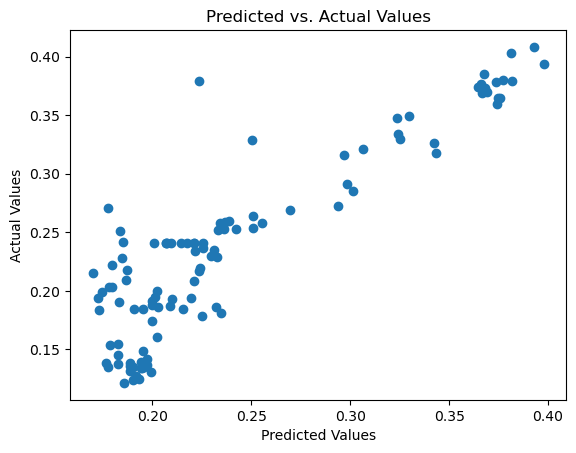

In [33]:
import matplotlib.pyplot as plt

lr_y_predict = lr_model.predict(X_test)
plt.scatter(lr_y_predict, y_test) 
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

## 4.3 Train a SVM model

In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# Create and train the SVR model
svr_model = SVR()

# Tune hyperparameter using GridSearchCV to find the best parameters
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10, 'scale', 'auto'], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Apply best parameters
svr_model = SVR(**best_params)

# Print the best parameters
print("best_params = ",best_params)
# Fit the SVR model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_y_pred = svr_model.predict(X_test)

svm_mse = mean_squared_error(y_test, svr_y_pred)
print(f"Mean Squared Error: {svm_mse}")

best_params =  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Mean Squared Error: 0.0032999552297932706


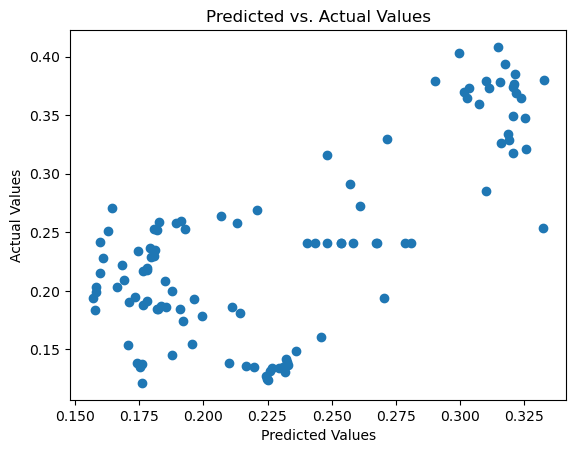

In [35]:
# plot the scatter chart
plt.scatter(svr_y_pred, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

## 4.4 Train a Decision Tree model

In [36]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(max_depth=6)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [37]:
rf_y_predict = dt_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_predict)
print(f'Mean Squared Error: {rf_mse}')

Mean Squared Error: 0.00018755908779389036


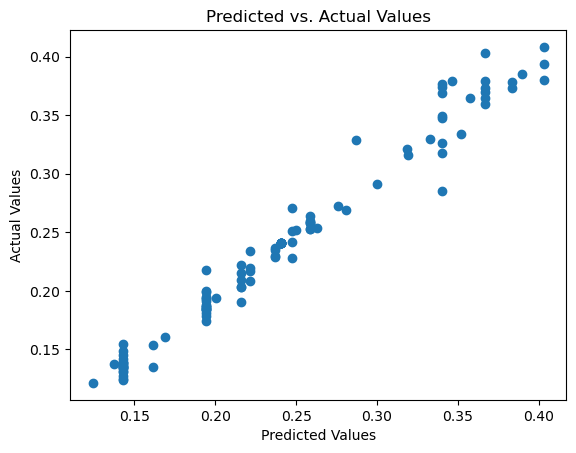

In [38]:
plt.scatter(rf_y_predict, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

###  Visualize a decision tree

## 4.5 Evaluate three machine learning algorithms according to their Mean Squared Error(MSE)

In [39]:
#print the mse for each model
print(f'mse for Liner Regrssion: {lr_mse}')
print(f'mse for SVM: {svm_mse}')
print(f'mse for Decision Tree: {rf_mse}')

mse for Liner Regrssion: 0.0013815771152817266
mse for SVM: 0.0032999552297932706
mse for Decision Tree: 0.00018755908779389036


### We can conclude that Random Forest has the best performacne since it has the lowest MSE.

## 5. Three graphs for the best performing algorithm (descision tree)

### 1. Plot the predicted vs. actual values scatter chart

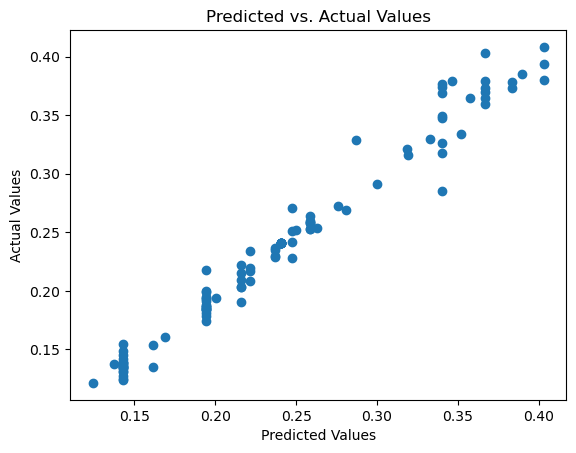

In [40]:
plt.scatter(rf_y_predict, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

### 2. Plot the learning curve graph

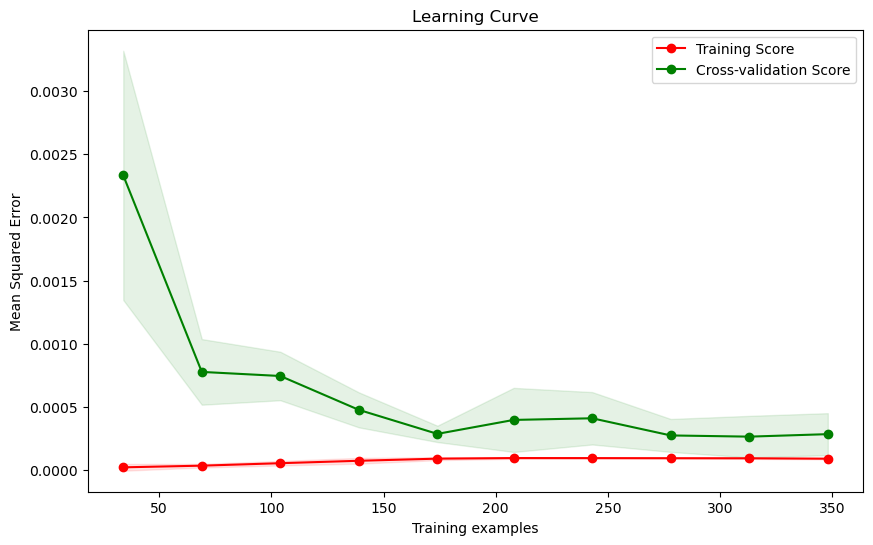

In [41]:
from sklearn.model_selection import learning_curve

model = dt_regressor

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training scores and testing scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

### 3. Plot the decision tree

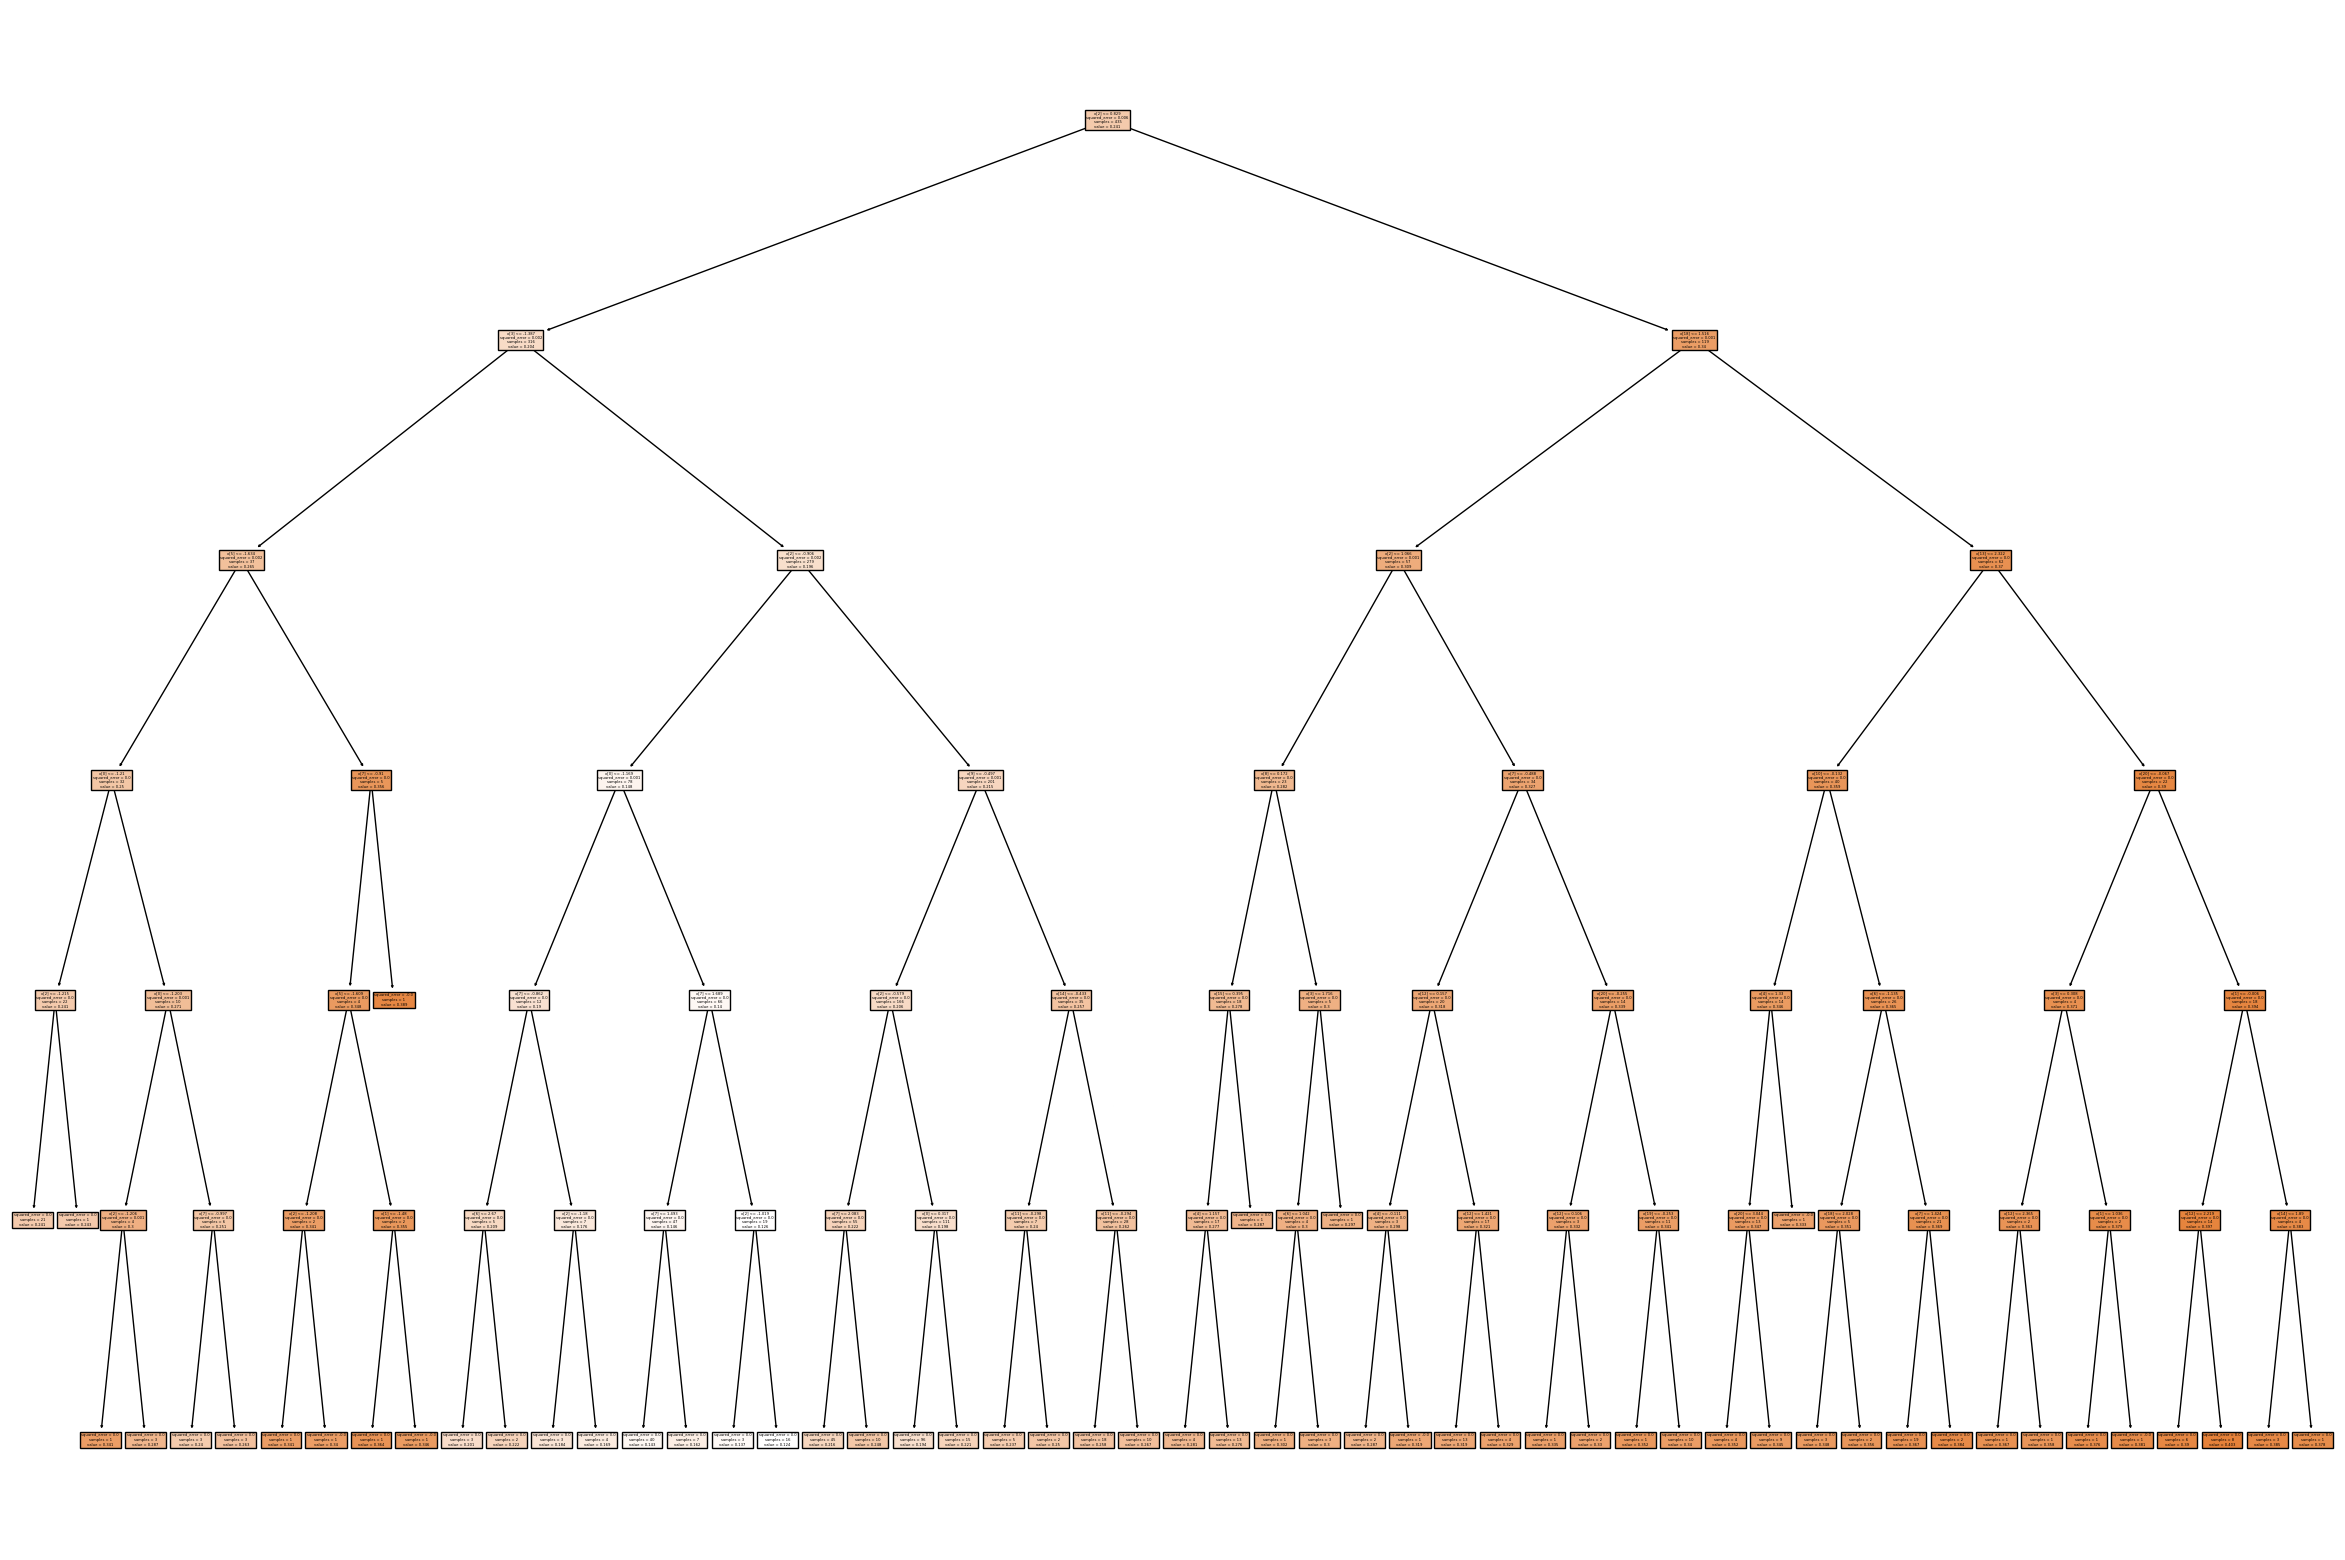

In [42]:
from sklearn import tree
plt.figure(figsize=(30, 20))
tree.plot_tree(dt_regressor, filled=True)
plt.show()